In [1]:
from tqdm import tqdm
import os
import time
from random import randint
 
import gc 
import numpy as np
from scipy import stats
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold

import nibabel as nib
import pydicom as pdm

import h5py

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as anim
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import seaborn as sns
import imageio
from skimage.transform import resize
from skimage.util import montage

from IPython.display import Image as show_gif
from IPython.display import clear_output
from IPython.display import YouTubeVideo

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.nn import MSELoss

# !pip install albumentations==0.4.6
import albumentations as A
# from albumentations.pytorch import ToTensor, ToTensorV2

import cv2


from albumentations import Compose, HorizontalFlip
# from albumentations.pytorch import ToTensor, ToTensorV2 

import warnings
warnings.simplefilter("ignore")

0


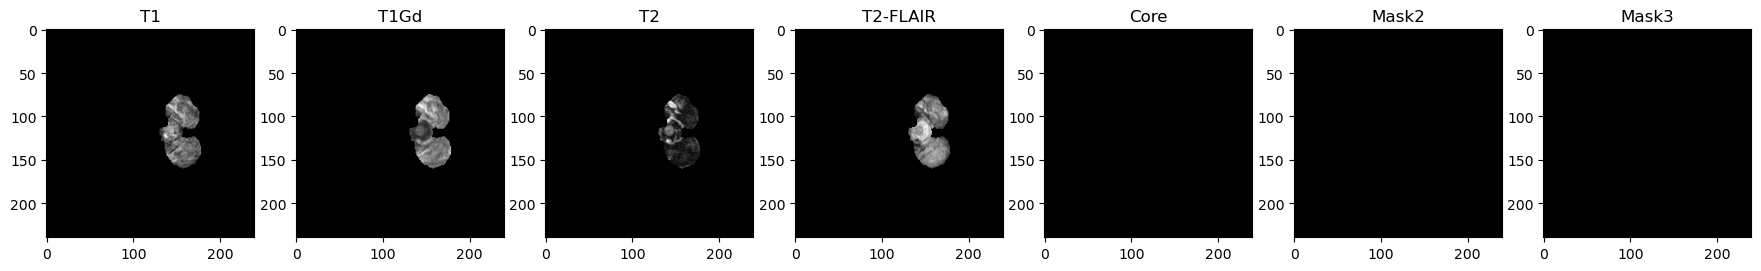

1


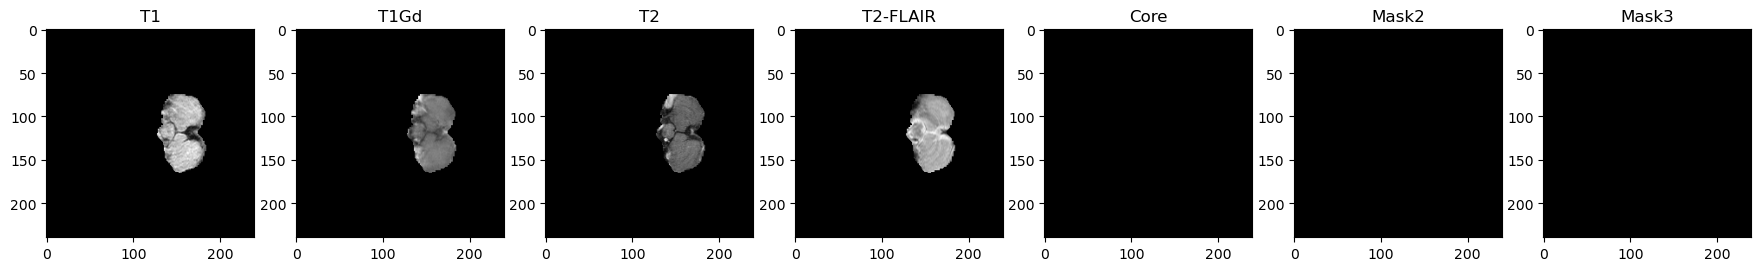

2


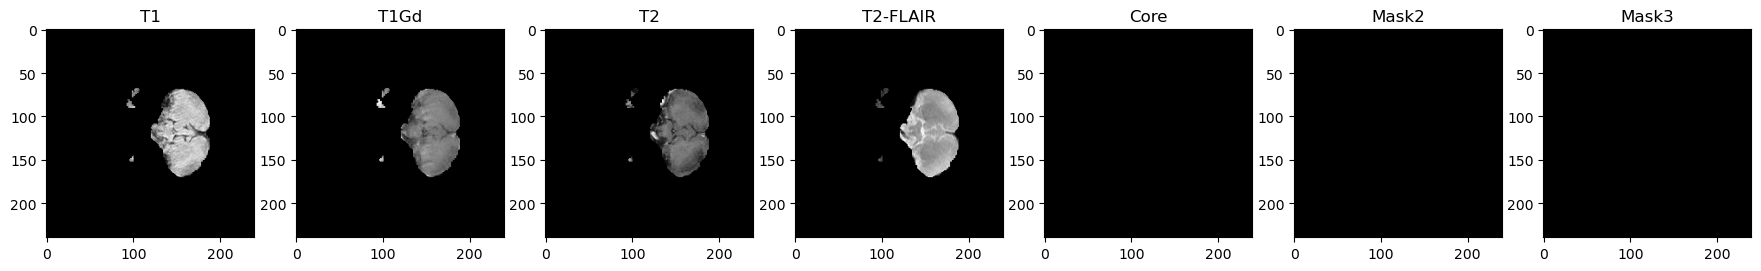

3


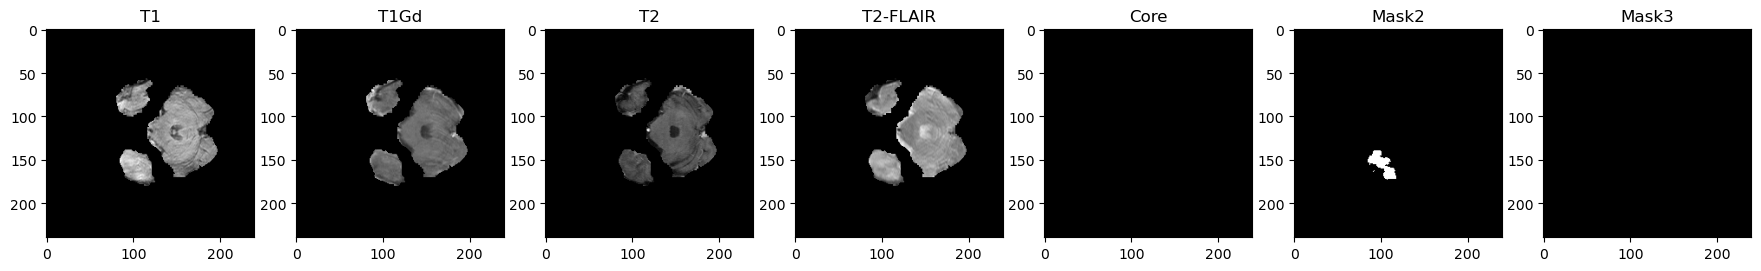

4


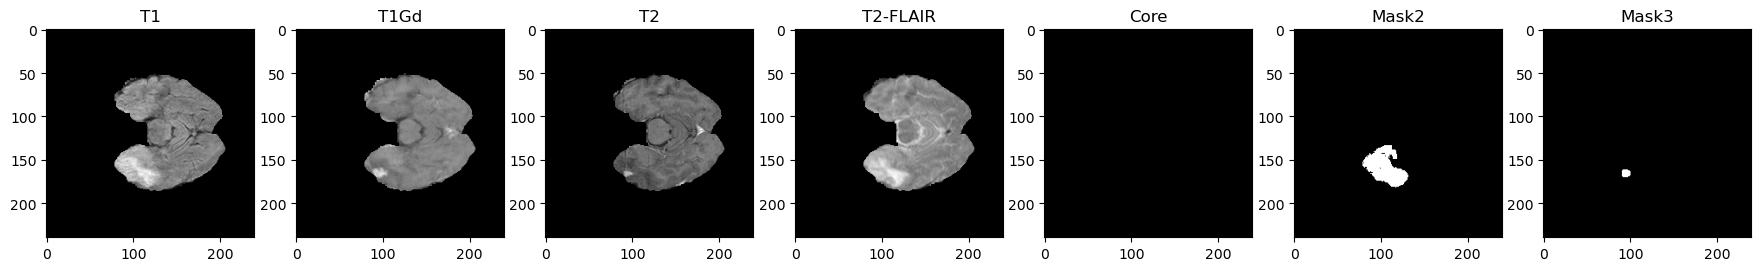

5


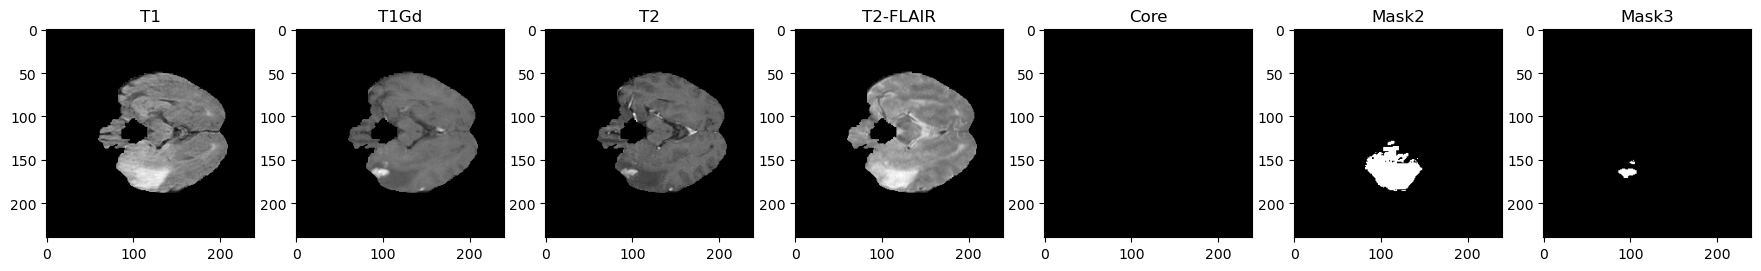

6


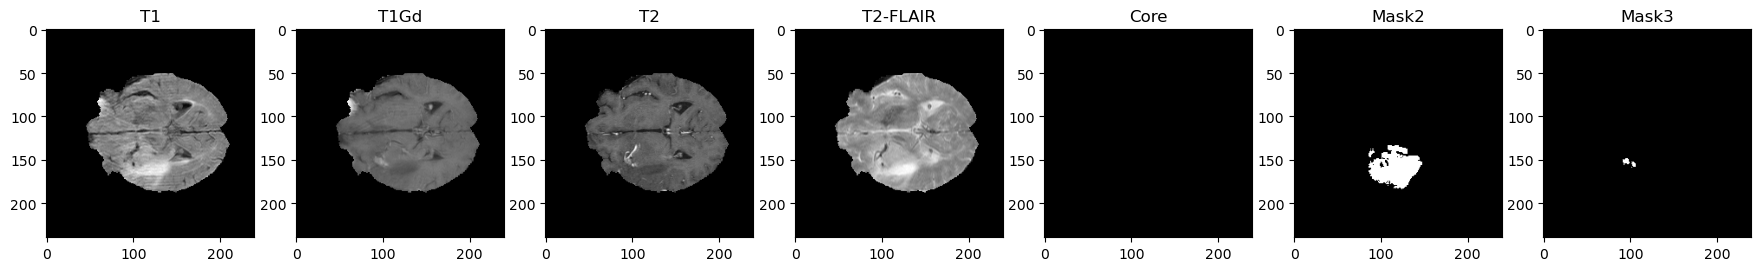

7


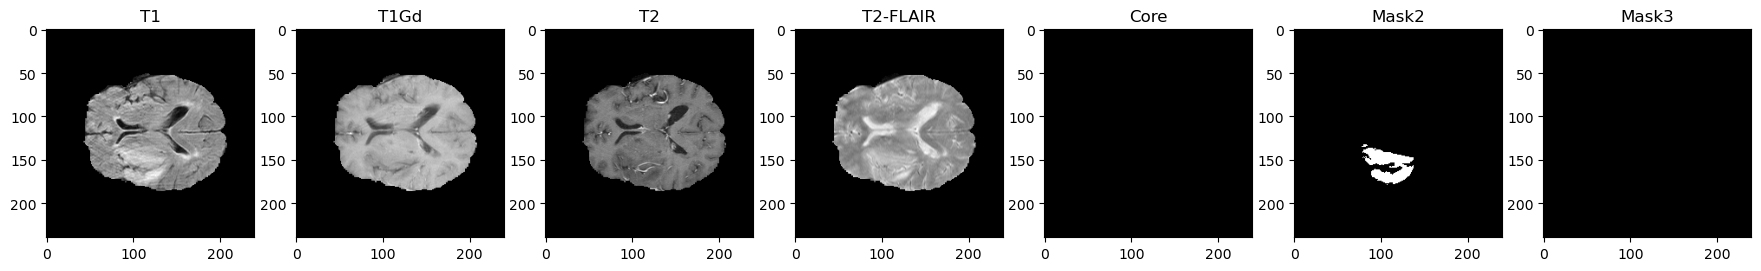

8


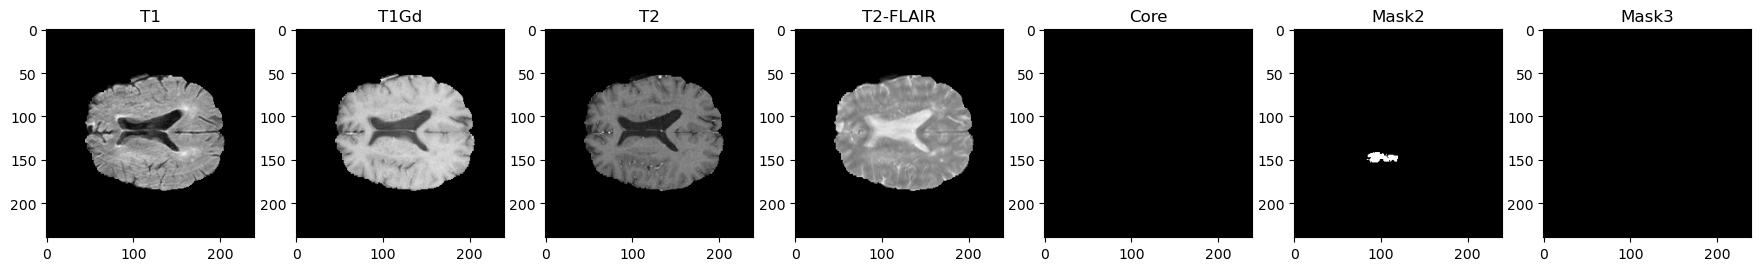

9


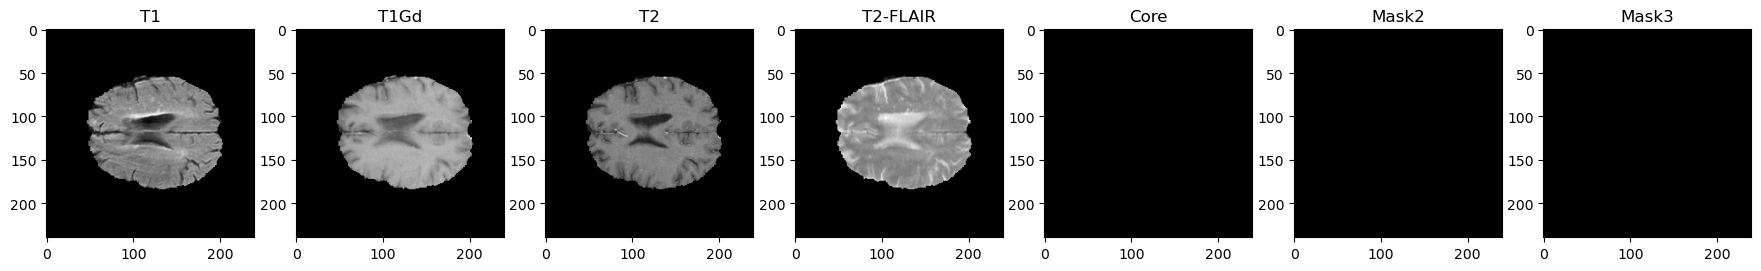

In [2]:
for i in range(10):
    imgpath='/ssd_scratch/cvit/anirudhkaushik/datasets/brats2020-training-data/BraTS2020_training_data/content/data/volume_250_slice_'+str(i*10)+'.h5'
    f=h5py.File(imgpath,'r')
    img=f['image']
    imgArray=np.array(img)
    norm=cv2.normalize(imgArray[:,:,0],None, norm_type=cv2.NORM_MINMAX)
    fig = plt.figure(figsize=(22, 6))
    fig.add_subplot(1, 7, 1)
    plt.imshow(norm,cmap = "gray")
    plt.title("T1")
    norm=cv2.normalize(imgArray[:,:,1],None, norm_type=cv2.NORM_MINMAX)
    fig.add_subplot(1, 7, 2)
    plt.imshow(norm,cmap = "gray")
    plt.title("T1Gd")
    norm=cv2.normalize(imgArray[:,:,2],None, norm_type=cv2.NORM_MINMAX)
    fig.add_subplot(1, 7, 3)
    plt.imshow(norm,cmap = "gray")
    plt.title("T2")
    norm=cv2.normalize(imgArray[:,:,3],None, norm_type=cv2.NORM_MINMAX)
    fig.add_subplot(1, 7, 4)
    plt.imshow(norm,cmap = "gray")
    plt.title("T2-FLAIR")
    img=f['mask']
    imgArray=np.array(img)
    norm=cv2.normalize(imgArray[:,:,0],None, norm_type=cv2.NORM_MINMAX)
    fig.add_subplot(1, 7, 5)
    plt.imshow(norm*255, cmap = "gray")
    plt.title("Core")
    norm=cv2.normalize(imgArray[:,:,1]+imgArray[:,:,2],None, norm_type=cv2.NORM_MINMAX)
    fig.add_subplot(1, 7, 6)
    plt.imshow(norm*255, cmap = "gray")
    plt.title("Mask2")
    norm=cv2.normalize(imgArray[:,:,2],None, norm_type=cv2.NORM_MINMAX)
    fig.add_subplot(1, 7, 7)
    plt.imshow(norm*255, cmap = "gray")
    plt.title("Mask3")
    print(i)
    plt.show()

In [3]:
PATH= "/ssd_scratch/cvit/anirudhkaushik/datasets/brats2020-training-data/BraTS2020_training_data/content/data/"

# organize as per volumes
volumes = {}
import glob
for file in glob.glob(PATH+'volume_*'):
    file = file.split('/')[-1]
    vol_ind = file.split('_')[1] 
    if vol_ind not in volumes:
        volumes[vol_ind] = []
    volumes[vol_ind].append(file)

# sort the slices
for vol in volumes:
    volumes[vol] = sorted(volumes[vol], key=lambda x: int(x.split('_')[3].split('.')[0]))

# get slices with tumor (mask2 has white pixels for tumor)
slices = []
for vol in volumes:
    for slice in volumes[vol]:
        f = h5py.File(PATH+slice, 'r')
        mask = f['mask']
        mask = np.array(mask)
        if np.sum(mask[:,:,1]) > 1000:
            slices.append(slice)


print(len(slices))

8557


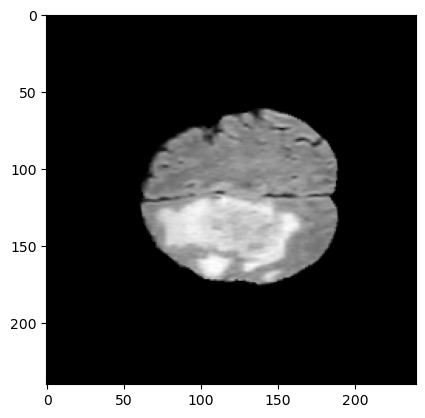

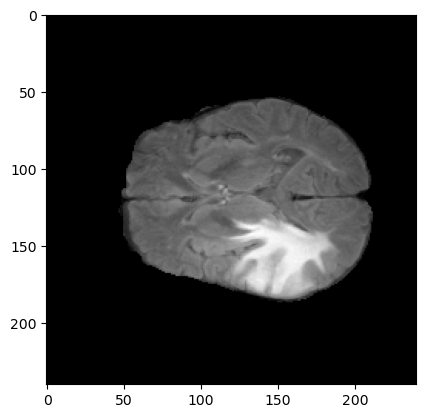

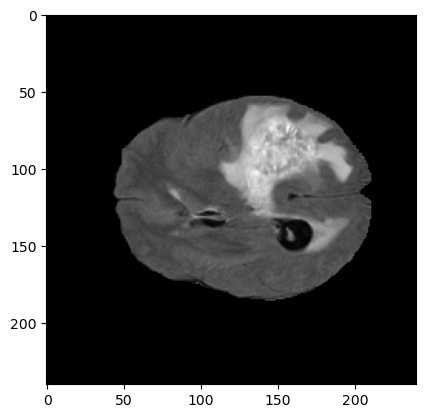

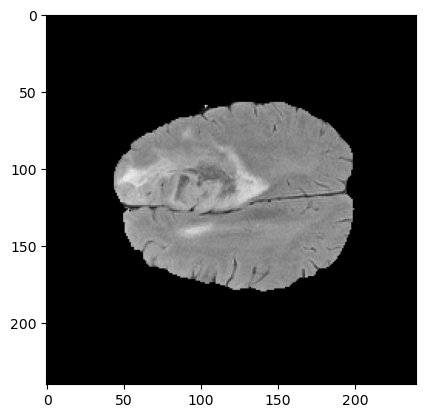

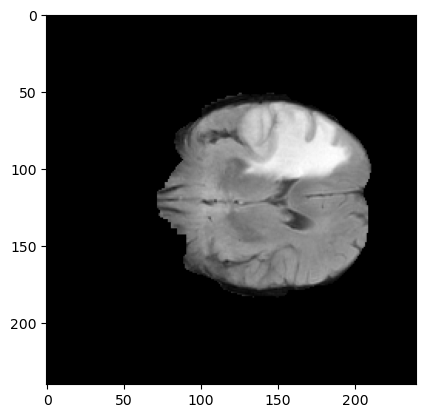

In [4]:
# randomly display 5 slices

for i in range(5):
    f = h5py.File(PATH+slices[randint(0, len(slices))], 'r')
    img = f['image']
    img = np.array(img)

    img = cv2.normalize(img[:,:,0], None, norm_type=cv2.NORM_MINMAX)
    plt.imshow(img, cmap='gray')    
    plt.show()    



/ssd_scratch/cvit/anirudhkaushik/datasets/healthy_brain/train/sub-541464924960_preproc-quasiraw_T1w.npy


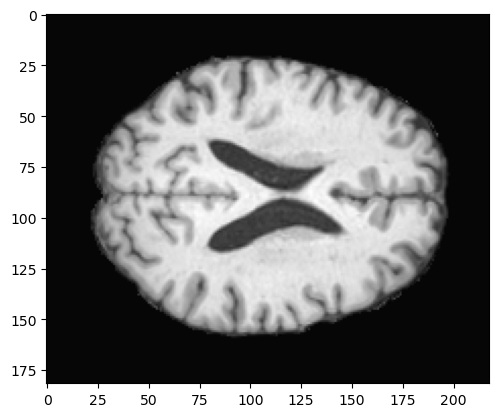

In [13]:
# load npy files
PATH2 = "/ssd_scratch/cvit/anirudhkaushik/datasets/healthy_brain/train/"
healthy_brain = []
for file in glob.glob(PATH2 + "*"):
    print(file)
    img = np.load(file)
    img = cv2.normalize(img, None, norm_type=cv2.NORM_MINMAX)
    img = img.reshape(img.shape[2:])
    plt.imshow(img[:,:,img.shape[2]//2], cmap='gray')
    plt.show()
    break
